In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [4]:
import os

path = '/content/drive/MyDrive/mlLab/SMSSpamCollection'
df = pd.read_csv(path, sep='\t', header=None, names=['label', 'message'])

df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


label
ham     4825
spam     747
Name: count, dtype: int64


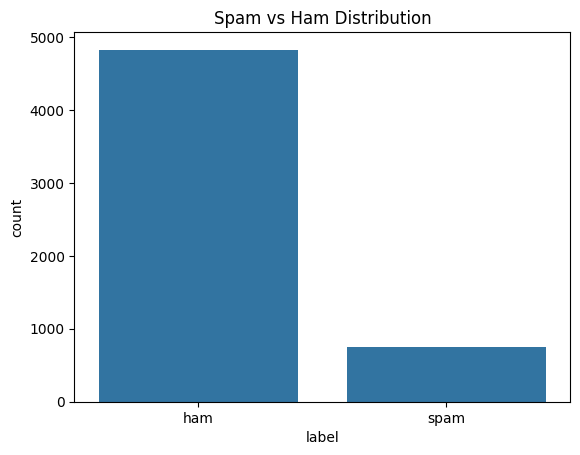

In [5]:
print(df['label'].value_counts())

sns.countplot(data=df, x='label')
plt.title("Spam vs Ham Distribution")
plt.show()

In [6]:
#Preprocess Labels (Convert to numeric)
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

In [7]:
#Split Data
X = df['message']
y = df['label_num']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

In [8]:
#Text Vectorization
vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [9]:
#Train Naïve Bayes Model
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)

y_pred = nb.predict(X_test_vec)

Accuracy: 0.9847533632286996

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.96      0.92      0.94       149

    accuracy                           0.98      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.98      0.98      0.98      1115



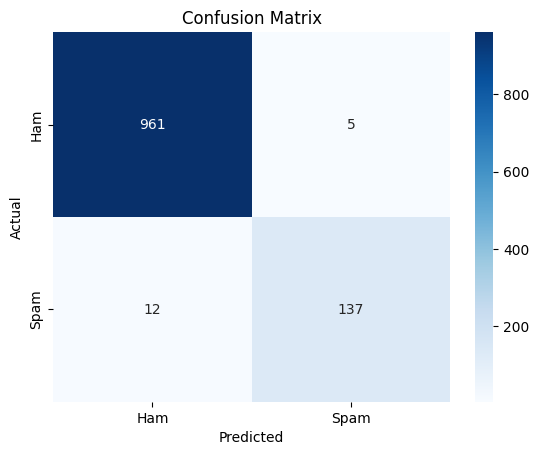

In [10]:
#Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
